In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\dimpu\OneDrive\Desktop\Web_Scarping_project\data\final_file.csv')

In [3]:
df.head()

,Job Title,Company Name,Location,Experience Level,Industry,No of Applications,Domain,AI_Impact_Category
0,Software Engineer (AI/ML),Neilsoft Inc.,"Pune, Maharashtra, India",Entry level,Design Services,68,AI/ML Engineer,AI Adoption Affected
1,Software Engineer - Applied AI Engineer,Postman Corp,"Bengaluru, Karnataka, India",Entry level,Staffing and Recruiting,168,AI/ML Engineer,AI Adoption Affected
2,ML Inference Platform Intern (6 months),aion,"Bengaluru, Karnataka, India",Entry level,IT Services and IT Consulting,49,AI/ML Engineer,AI Adoption Affected
3,AI ML Engineer,Gsource Technologies LLC,"Pune, Maharashtra, India",Entry level,Design Services,200,AI/ML Engineer,AI Adoption Affected
4,AI/ML Engineer | Remote,Sofueled,"Panaji, Goa, India",Entry level,IT Services and IT Consulting,200,AI/ML Engineer,AI Adoption Affected


In [4]:
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Experience Level', 'Industry',
       'No of Applications', 'Domain', 'AI_Impact_Category'],
      dtype='object')

In [5]:
df.shape

(4802, 8)

## Exploratory Data Analysis:
- Previously we have examined tables in the database to identify key variables, determined which one should be included in the final analysis and removed other fields, handles missing values, removed duplicates and added new field for futher analysis 

- In this phase of EDA, we will analyse the resultant table to gain insights in the distribution of each column, This will help us understand the data patterns, identify anamolies and ensure data quality before proceeding with further analysis

In [6]:
df.dtypes

Job Title             object
Company Name          object
Location              object
Experience Level      object
Industry              object
No of Applications     int64
Domain                object
AI_Impact_Category    object
dtype: object

In [7]:
df.describe(include='object')

,Job Title,Company Name,Location,Experience Level,Industry,Domain,AI_Impact_Category
count,4802,4802,4802,4802,4802,4802,4802
unique,2627,1634,53,3,121,11,3
top,DevOps Engineer,Tata Consultancy Services,"Bengaluru, Karnataka, India",Mid-Senior level,IT Services and IT Consulting,Data Analyst,Low AI Impact
freq,121,167,1456,2202,1832,849,2500


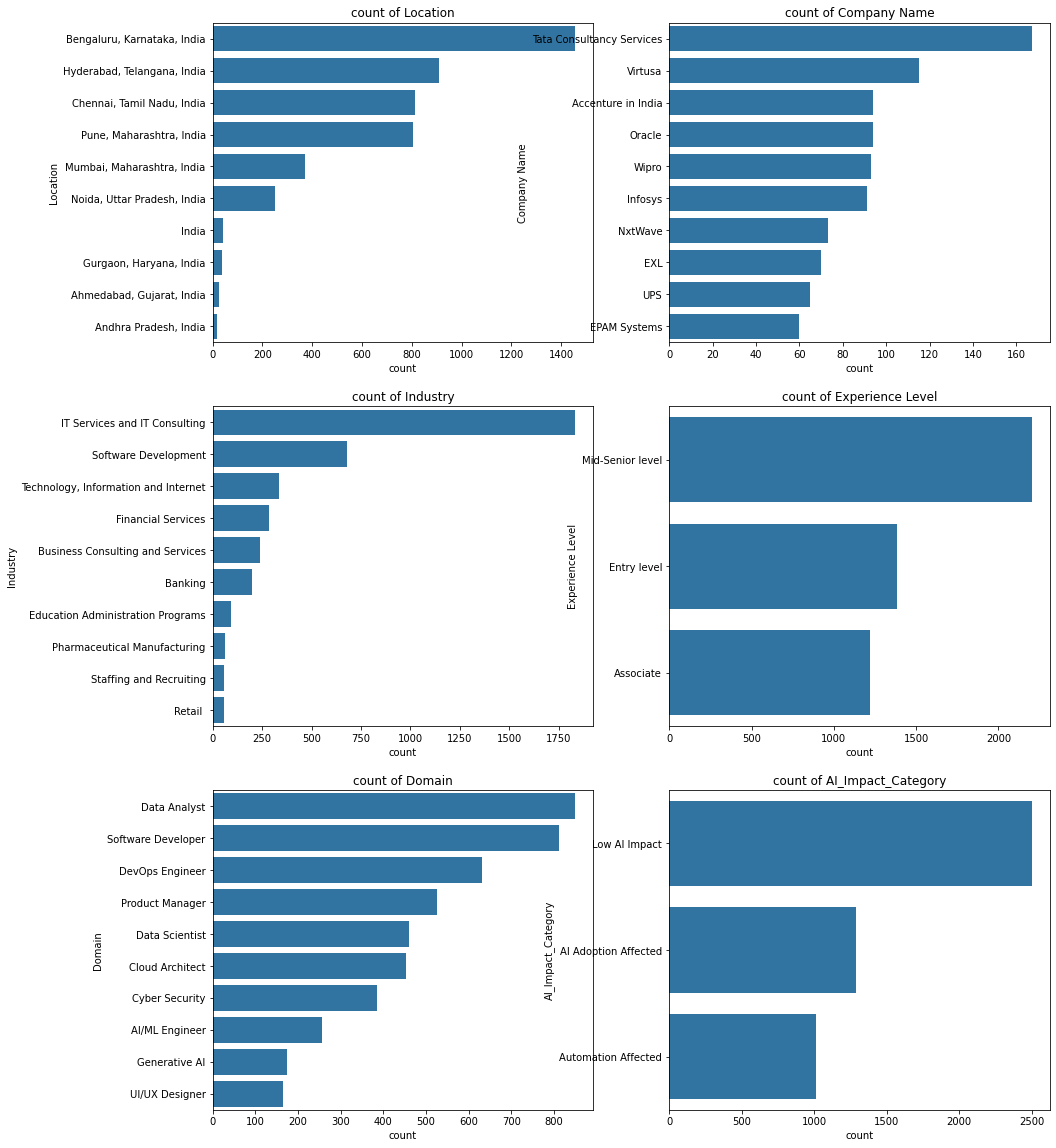

In [8]:
categorical_columns=['Location','Company Name','Industry','Experience Level','Domain','AI_Impact_Category']

plt.figure(figsize=(15,20))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10
    plt.title(f"count of {col}")
plt.tight_layout
plt.show()

## Summary Insights

- **Top Work Locations**: Bengaluru leads with over **1,000** job entries, followed by Hyderabad, Chennai and Pune with around **600–800** each. These cities are major tech hubs in India.

- **Popular Companies**: Tata Consultancy Services has the most listings—more than **150**. Other big companies include Virtusa, Oracle, Wipro, and Infosys, each with **100–120** roles.

- **Experience Level**: Most jobs are for **Mid-Senior level** professionals—about **2000** roles. Entry-level and Associate positions are less compared to Mid-Senior level, around **1000–1500** each.

- **AI Impact**: Around **2500** roles are marked as having **Low AI Impact**, while **1000–1500** are affected by AI adoption or automation. This shows many tech jobs are still safe from AI disruption.


In [11]:
df.describe()

,No of Applications
count,4802.000000
mean,139.203457
std,71.404262
min,25.000000
25%,63.000000
50%,200.000000
75%,200.000000
max,200.000000


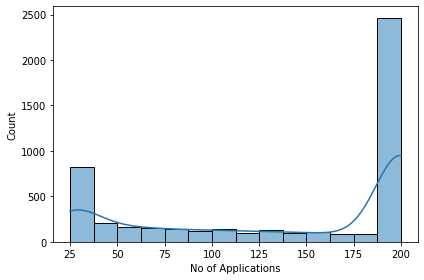

In [12]:
sns.histplot(df['No of Applications'],kde=True)
plt.tight_layout()
plt.show()

## Summary Statistics Insights :

- The **median (50%)** and **75th percentile** are both **200** and the **maximum** is also **200**. This means at least half of the records reached the cap of 200 applications, suggesting either a system-imposed limit or that many applicants consistently hit the maximum allowed.


-  The mean is about **140**, but the standard deviation is **71.4**, showing wide spread. However, the **minimum** is only **25**, and the **25th** percentile is **63**, which indicates a **large gap** between low-application cases and the capped maximum. This skew suggests two groups: one with relatively few applications and another hitting the maximum.


## Data Analysis

- Which job domains are most associated with AI adoption, automation risk, and low AI impact?

In [13]:
df.head()

,Job Title,Company Name,Location,Experience Level,Industry,No of Applications,Domain,AI_Impact_Category
0,Software Engineer (AI/ML),Neilsoft Inc.,"Pune, Maharashtra, India",Entry level,Design Services,68,AI/ML Engineer,AI Adoption Affected
1,Software Engineer - Applied AI Engineer,Postman Corp,"Bengaluru, Karnataka, India",Entry level,Staffing and Recruiting,168,AI/ML Engineer,AI Adoption Affected
2,ML Inference Platform Intern (6 months),aion,"Bengaluru, Karnataka, India",Entry level,IT Services and IT Consulting,49,AI/ML Engineer,AI Adoption Affected
3,AI ML Engineer,Gsource Technologies LLC,"Pune, Maharashtra, India",Entry level,Design Services,200,AI/ML Engineer,AI Adoption Affected
4,AI/ML Engineer | Remote,Sofueled,"Panaji, Goa, India",Entry level,IT Services and IT Consulting,200,AI/ML Engineer,AI Adoption Affected


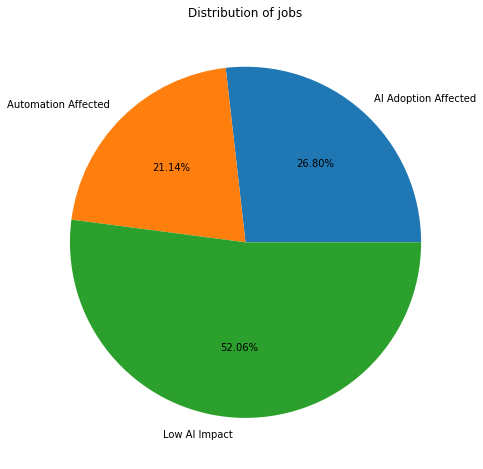

In [9]:
dist=df.groupby('AI_Impact_Category').agg(count1=('AI_Impact_Category','count')).reset_index()#make visual -> pie chart

plt.figure(figsize=(7,7))
plt.pie(dist.count1,labels=dist.AI_Impact_Category,autopct='%0.2f%%')
plt.title('Distribution of jobs')
plt.tight_layout()
plt.show()

- More than 1000 i.e 21% jobs are automation affected
- More than 25% of jobs are ai adoption affected
- More than half of the jobs were non ai roles

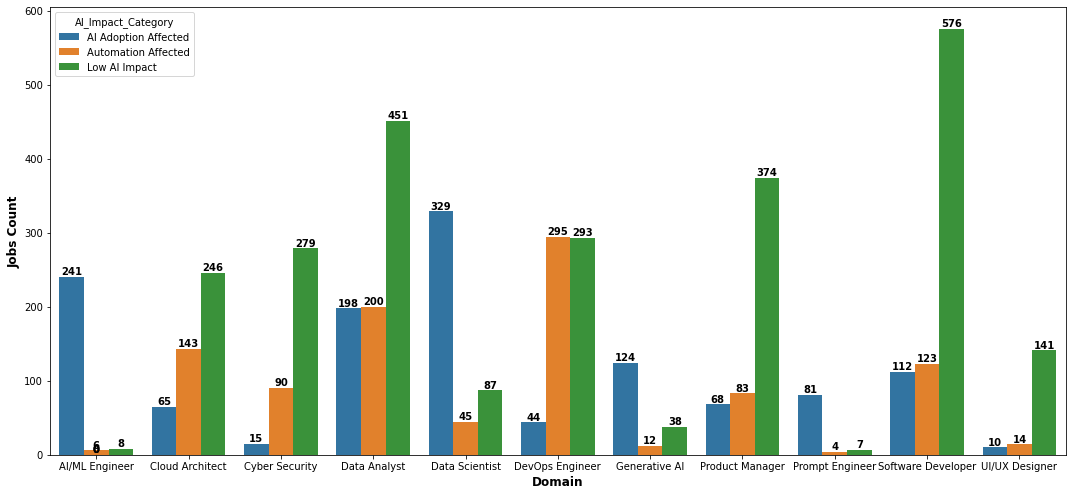

In [15]:
domain_filter1=df.groupby(['Domain','AI_Impact_Category']).agg(count1=('AI_Impact_Category','count')).reset_index()

plt.figure(figsize=(15,7))

ax1=sns.barplot(data=domain_filter1,x='Domain',y='count1',hue='AI_Impact_Category')

plt.xlabel("Domain", fontsize=12, fontweight='bold')
plt.ylabel('Jobs Count', fontsize=12, fontweight='bold')

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2,p.get_height(),int(p.get_height()),ha='center', va='bottom',fontweight='bold')


plt.tight_layout()
plt.show()

- Domains most associated with AI adoption are AI/ML Engineer(94%), Prompt Engineer(88%), Data Scientist(71.3%), Gen AI(71.2%)
- Domains most associated with automation risk are Devops Engineer(46%) followed by Cloud Architect(31%), Data Analyst(23.5%), Cyber Security(23.4%) 
  **Data analyst** and **Cyber Security** were not more affected by automation
 
- Domains associated with low AI impact UI/UX Designer,Cyber Security, Product Manager, Software Developer followed by         
  **Cloud Architect**, **DevOps Engineer**, **Data Analyst** were not highly safe from AI

- Did AI tools make a key role of switching from junior to senior level?

In [16]:
ai_adoption_roles=df[df['AI_Impact_Category']=='AI Adoption Affected']
job_roles=ai_adoption_roles.groupby(['Experience Level','AI_Impact_Category']).agg(count_ai=('AI_Impact_Category','count')).reset_index()


automation_roles=df[df['AI_Impact_Category']=='Automation Affected']
automation_job_roles=automation_roles.groupby(['Experience Level','AI_Impact_Category']).agg(count_ai=('AI_Impact_Category','count')).reset_index()



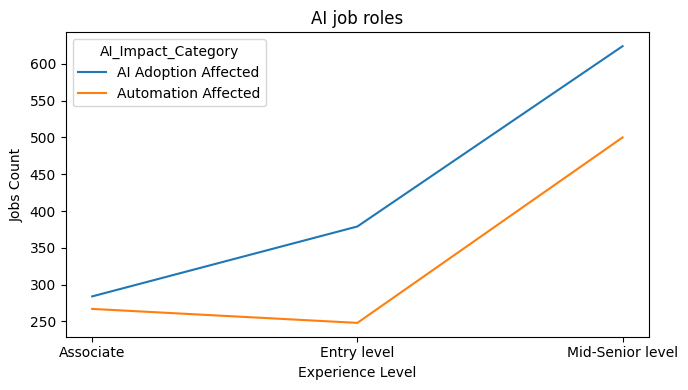

In [17]:
df2=df[(df['AI_Impact_Category']=='AI Adoption Affected') | (df['AI_Impact_Category']=='Automation Affected')]
df1=df2.groupby(['Experience Level','AI_Impact_Category']).agg(job_count=('AI_Impact_Category','count')).reset_index()

plt.figure(figsize=(7,4), dpi=100)  # smaller size, lower dpi

ax1=sns.lineplot(data=df1,x='Experience Level',y='job_count',hue='AI_Impact_Category')
plt.title('AI job roles')
plt.ylabel('Jobs Count')

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2,p.get_height(),int(p.get_height()),ha='center', va='bottom')

    
plt.tight_layout()
plt.show()

- In AI adoption and automation related roles mid senior level roles are almost twice of junior roles - that means ai tools  and experience make a key role in switching from junior to senior level position


- How does the number of applications vary between ai-affected and ai-resistant jobs across experience levels?

In [18]:
ai_affected_jobs=df[(df['AI_Impact_Category']=='AI Adoption Affected') | (df['AI_Impact_Category']=='Automation Affected')]
ai_affected_jobs.shape

(2302, 8)

In [19]:
ai_resistant_jobs=df[df['AI_Impact_Category']=='Low AI Impact']
ai_resistant_jobs.head()

,Job Title,Company Name,Location,Experience Level,Industry,No of Applications,Domain,AI_Impact_Category
8,AI / ML Engineer - Computer Vision,Infiswift Technologies,"Pune, Maharashtra, India",Entry level,Software Development,200,AI/ML Engineer,Low AI Impact
26,AI/ML Engineer,APR Hub Technologies,"Hyderabad, Telangana, India",Entry level,Software Development,200,AI/ML Engineer,Low AI Impact
51,Associate Software Engineer (IITs/NITs only),Fission Labs,"Hyderabad, Telangana, India",Entry level,Software Development,200,AI/ML Engineer,Low AI Impact
82,AI Platform Administrator,Arm,"Bengaluru, Karnataka, India",Associate,Semiconductor Manufacturing,38,AI/ML Engineer,Low AI Impact
83,AI Platform Administrator,Arm,"Bengaluru, Karnataka, India",Associate,Semiconductor Manufacturing,39,AI/ML Engineer,Low AI Impact


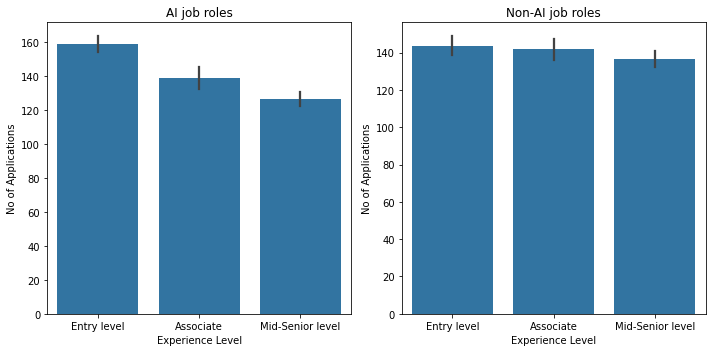

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(data=ai_affected_jobs,x='Experience Level',y='No of Applications')
plt.title('AI job roles')

plt.subplot(1,2,2)
sns.barplot(data=ai_resistant_jobs,x='Experience Level',y='No of Applications')
plt.title('Non-AI job roles')

plt.tight_layout()
plt.show()

- no of applications for each job role is alomost same for non-ai job roles
- no of applications for ai job roles are more from entry level followed by associate and mid-senior level

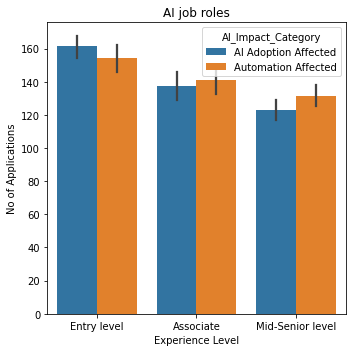

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(data=ai_affected_jobs,x='Experience Level',y='No of Applications',hue='AI_Impact_Category')
plt.title('AI job roles')
plt.tight_layout()
plt.show()

- But if we deeper for ai job roles ai adoption entry level job roles are litte more than automation entry level job roles
- In mid-senior level automation jobs were more than ai adoption job roles
- Associate job roles both categories perform nearly same

- Are certain locations in India recruiting more AI adoption or automation than low AI impact jobs?

In [22]:
loc_filter=df.groupby(['Location']).agg(
    jobs_count=('AI_Impact_Category', 'count')
).sort_values(by='jobs_count',ascending=False).reset_index().head(10)
locations=loc_filter['Location']
locations

0    Bengaluru, Karnataka, India
1    Hyderabad, Telangana, India
2     Chennai, Tamil Nadu, India
3       Pune, Maharashtra, India
4     Mumbai, Maharashtra, India
5    Noida, Uttar Pradesh, India
6                          India
7        Gurgaon, Haryana, India
8      Ahmedabad, Gujarat, India
9          Andhra Pradesh, India
Name: Location, dtype: object

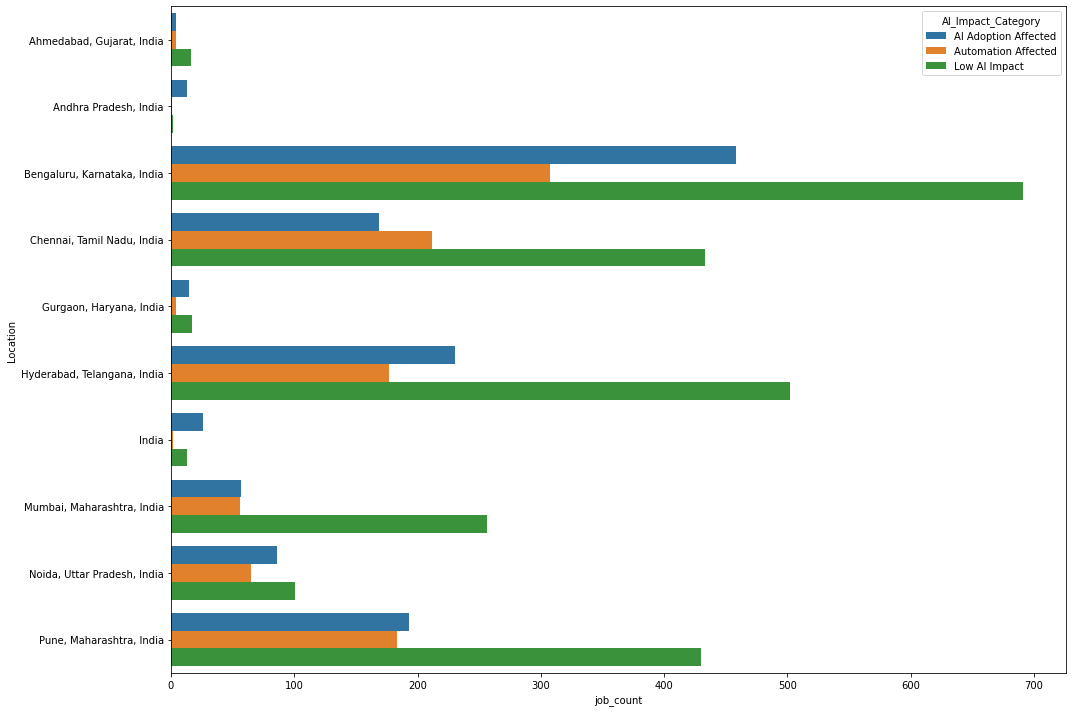

In [23]:
location_filter=df[df['Location'].isin(locations)]

loc=location_filter.groupby(['Location','AI_Impact_Category']).agg(job_count=('AI_Impact_Category','count')).reset_index()

plt.figure(figsize=(15,10))

sns.barplot(data=loc,x='job_count',y='Location',hue='AI_Impact_Category')
plt.tight_layout()
plt.show()


- Andhar Pradesh,Gurugraon and Noida are emerging as AI-first hiring hubs, where opportunities in AI adoption and automation significantly outpace traditional non‑AI roles.
- Bengaluru showcases a dual surge: more than half of openings lean toward AI adoption, while nearly half are tied to automation compared to non ai roles, underscoring the city’s role as a national leader in AI-driven transformation.
- In Chennai, the hiring narrative tilts toward automation-heavy roles, which clearly outnumber AI adoption positions, signaling a market preference for operational efficiency over strategic AI integration.
- Hyderabad, Mumbai, and Pune stand apart with a dominance of non‑AI roles, reflecting a comparatively slower pivot toward AI adoption and automation compared to other major metros.


- Which industries show the highest concentration of AI adoption vs automation risk?

In [31]:
df1=df[(df['AI_Impact_Category']=='AI Adoption Affected')| (df['AI_Impact_Category']=='Automation Affected') ]
ind_filter=df1.groupby('Industry').agg(jobs_count=('AI_Impact_Category','count')).sort_values(by='jobs_count',ascending=False).reset_index().head(10)
industry=ind_filter['Industry']
industry.replace('Data Infrastructure and Analytics, Technology, Information and Internet, and Software Development','Data Infrastructure and Analytics',inplace=True)
industry

0                        IT Services and IT Consulting
1                                 Software Development
2                 Technology, Information and Internet
3                                   Financial Services
4                     Business Consulting and Services
5                                              Banking
6                                              Retail 
7    Appliances, Electrical, and Electronics Manufa...
8                    Education Administration Programs
9                    Data Infrastructure and Analytics
Name: Industry, dtype: object

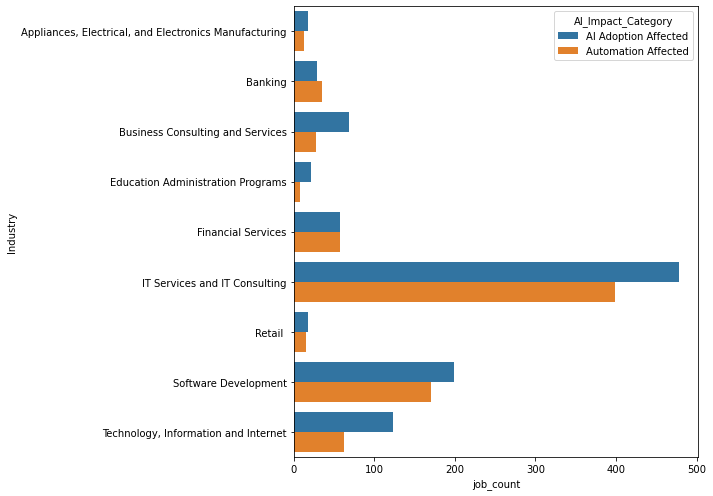

In [32]:
industry_df=df1[df1['Industry'].isin(industry)]

industry_filter=industry_df.groupby(['Industry','AI_Impact_Category']).agg(job_count=('AI_Impact_Category','count')).reset_index()

plt.figure(figsize=(10,7))

sns.barplot(data=industry_filter,x='job_count',y='Industry',hue='AI_Impact_Category')

plt.tight_layout()
plt.show()

- Most ai roles are from IT Services and IT Consulting followed by Software Development, Technology, Information and Internet
- In retail and Finalcial services Automation related jobs were almost equal to ai adoption jobs
- In others industrioes Ai adoption dominated automation related jobs 

Does the experience level have no effect on the likelihood of a job being AI-affected?

**Null Hypothesis (H₀):**

Experience level has no relationship with AI impact; the probability of a job being AI-affected is the same for entry, associate, and senior roles.

**Alternative Hypothesis (H₁):**

Experience level affects AI impact; entry-level jobs are more likely to be AI-affected than associate or senior roles.

In [11]:
df1=df.groupby(['Experience Level','AI_Impact_Category']).agg(job_counts=('AI_Impact_Category','count')).reset_index()
df1

,Experience Level,AI_Impact_Category,job_counts
0,Associate,AI Adoption Affected,284
1,Associate,Automation Affected,267
2,Associate,Low AI Impact,666
3,Entry level,AI Adoption Affected,379
4,Entry level,Automation Affected,248
5,Entry level,Low AI Impact,756
6,Mid-Senior level,AI Adoption Affected,624
7,Mid-Senior level,Automation Affected,500
8,Mid-Senior level,Low AI Impact,1078


In [12]:
data=pd.pivot_table(
    df1,
    values='job_counts',
    index='Experience Level',
    columns='AI_Impact_Category',
    aggfunc='sum'
)
data

AI_Impact_Category,AI Adoption Affected,Automation Affected,Low AI Impact
Experience Level,,,
Associate,284,267,666
Entry level,379,248,756
Mid-Senior level,624,500,1078


In [14]:
from scipy.stats import chi2_contingency

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(data)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:\n", expected)


Chi-square Statistic: 24.775336732646252
Degrees of Freedom: 4
P-value: 5.5822454772549265e-05

Expected Frequencies:
 [[ 326.17221991  257.23760933  633.59017076]
 [ 370.66243232  292.32507289  720.01249479]
 [ 590.16534777  465.43731778 1146.39733444]]


In [16]:
alpha = 0.05
if p < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: Experience level affects AI impact; entry-level jobs are more likely to be AI-affected than associate or mid-senior level roles.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: Experience level has no relationship with AI impact; the probability of a job being AI-affected is the same for entry level, associate and mid-senior level roles.")


Result: Reject the null hypothesis.
Conclusion: Experience level affects AI impact; entry-level jobs are more likely to be AI-affected than associate or mid-senior level roles.
